In [91]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [93]:
img2 = cv2.imread('shootanalysisdataset/schotanalyse/20200923_131144.jpg')

kernel = np.ones((5, 5), np.uint8)

resized_img = cv2.resize(img2, (round((img2.shape[1] / 4)), round((img2.shape[0] / 4))))
img_dilation = cv2.dilate(resized_img, kernel, iterations=1)
imagem = cv2.bitwise_not(img_dilation)

img_erosion = cv2.erode(resized_img, kernel, iterations=2)


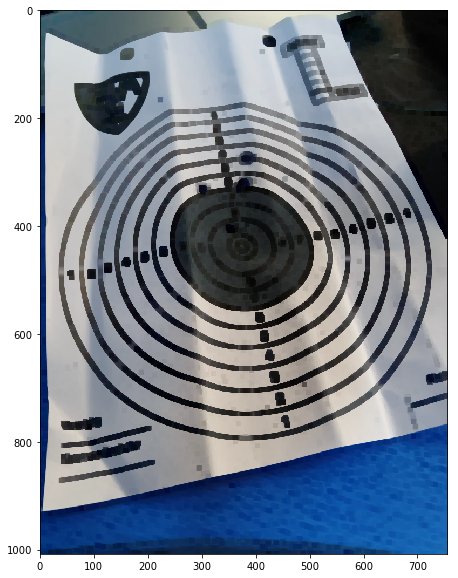

In [94]:
display(img_erosion)

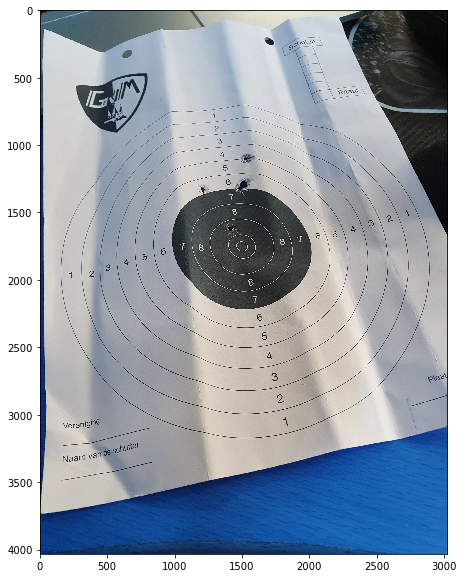

In [95]:
display(img2)

In [96]:
# Median blur
# Grayscale
# Binary threshold
# Find Contours

In [97]:
sep_blur = cv2.blur(resized_img,(20,20))

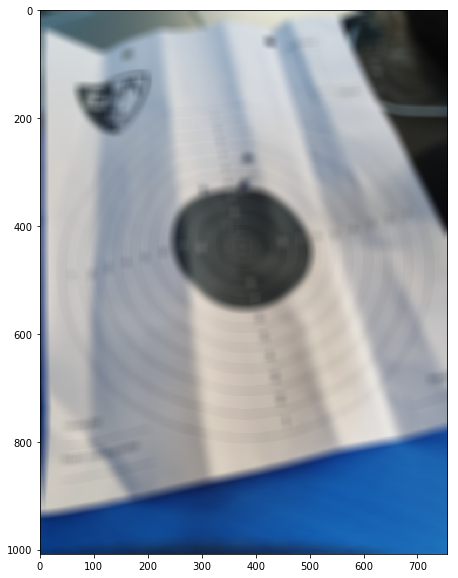

In [98]:
display(sep_blur)

In [99]:
gray_sep_coins = cv2.cvtColor(img_erosion, cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
final_img = clahe.apply(gray_sep_coins)

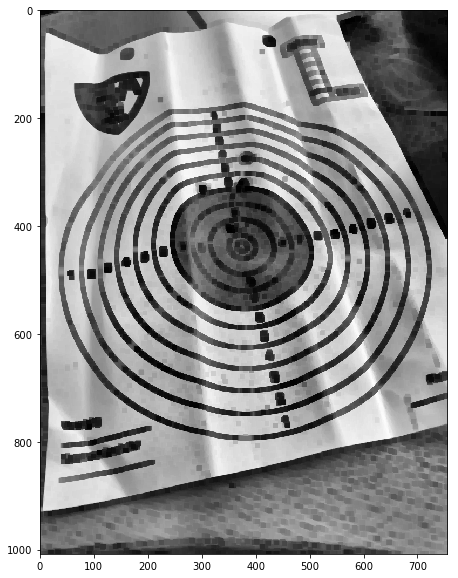

In [100]:
display(final_img)

In [101]:
#ret, sep_thresh = cv2.threshold(gray_sep_coins,170,255,cv2.ADAPTIVE_THRESH_MEAN_C  )
greyresized = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
sep_blur = cv2.blur(greyresized,(8,8))
sep_thresh = cv2.adaptiveThreshold(sep_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,3)
img_erosionv2 = cv2.erode(sep_thresh, kernel, iterations=1)


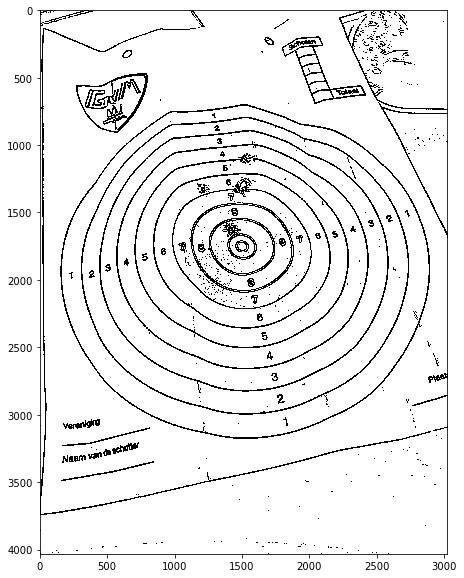

In [102]:
display(img_erosionv2)

In [103]:
contours,hierarchy = cv2.findContours(img_erosionv2.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

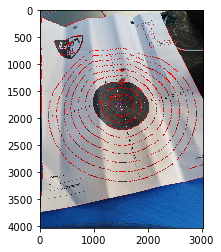

In [104]:
contour_list = []
for contour in contours:
    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    area = cv2.contourArea(contour)
    
    if ((len(approx) > 8) & (area > 30000) ):
        contour_list.append(contour)



plt.imshow(resized_img)

def scale_contour(cnt, scale):
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    cnt_norm = cnt - [cx, cy]
    cnt_scaled = cnt_norm * scale
    cnt_scaled = cnt_scaled + [cx, cy]
    cnt_scaled = cnt_scaled.astype(np.int32)

    return cnt_scaled

contour

for contour in contour_list:
    M = cv2.moments(contour)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    cv2.circle(img2, (cx, cy), 7, (255, 0, 255), -1)


cv2.drawContours(img2, contour_list,  -1, (255,0,0), 2)

    
#double_contour = scale_contour(contour_list[0], 0.45)

#cv2.drawContours(img2, [double_contour],  -1, (255,0,0), 2)

plt.imshow(img2)


In [105]:
len(contour_list)

27

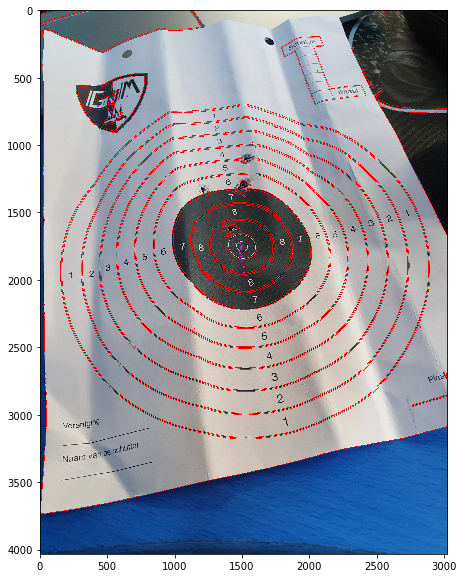

In [106]:
display(img2)

In [18]:
#contour_list

In [19]:
img = cv2.imread('shootanalysisdataset/schotanalyse/20200923_130835.jpg')

In [20]:
img = cv2.medianBlur(img,35)

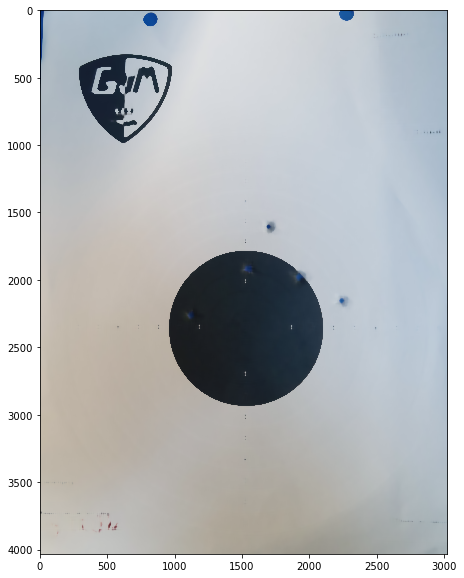

In [21]:
display(img)

In [180]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [181]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

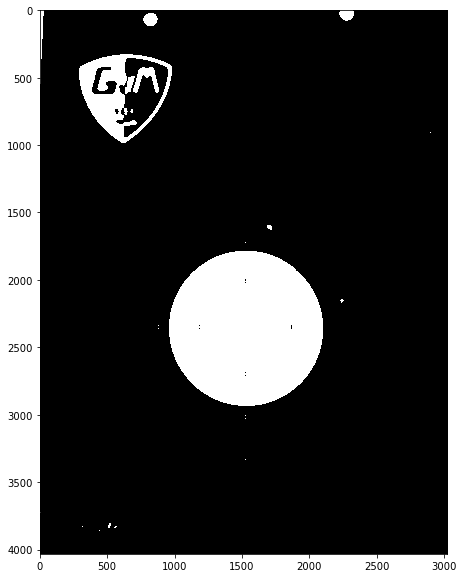

In [182]:
display(thresh)

In [38]:
# NOISE REMOVAL
kernel = np.ones((3,3), np.uint8)
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [39]:
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)

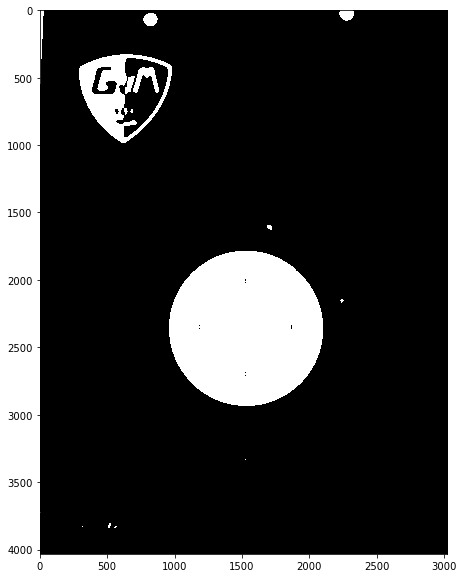

In [40]:
display(opening)

In [34]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)

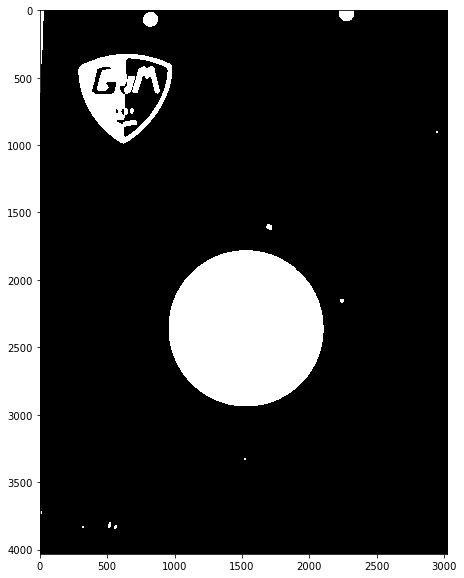

In [35]:
display(sure_bg)

In [36]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)

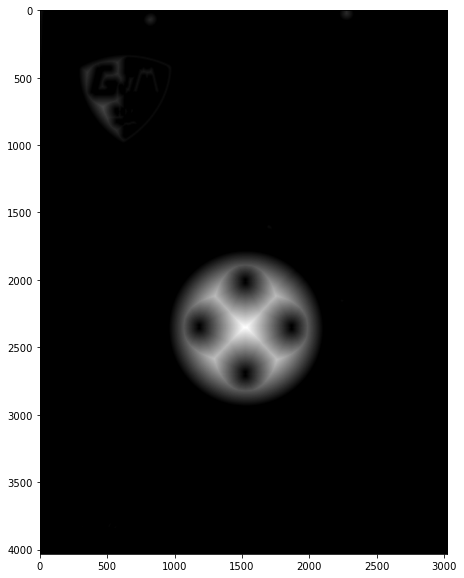

In [37]:
display(dist_transform)

In [38]:
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

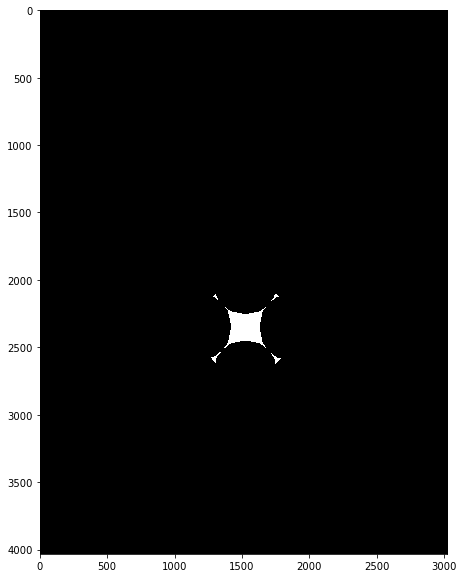

In [39]:
display(sure_fg)

In [40]:
sure_fg = np.uint8(sure_fg)

In [41]:
unknown = cv2.subtract(sure_bg,sure_fg)

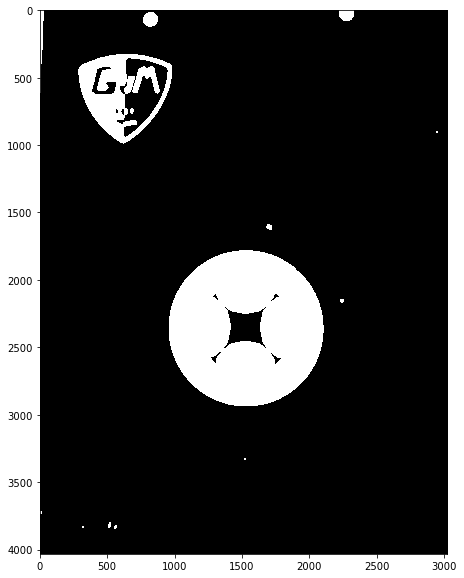

In [42]:
display(unknown)

In [43]:
ret , markers = cv2.connectedComponents(sure_fg)

In [44]:
markers = markers + 1

In [45]:
markers[unknown==255] = 0

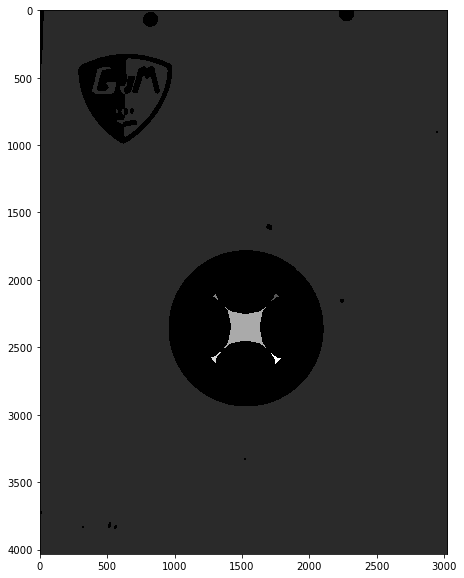

In [46]:
display(markers)

In [47]:
markers = cv2.watershed(img,markers)

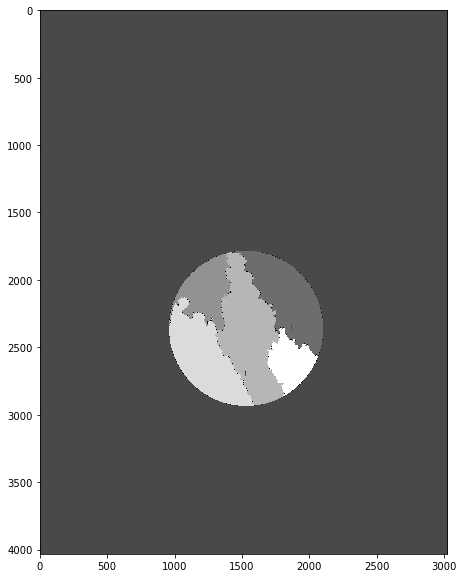

In [48]:
display(markers)

In [49]:
image,contours,hierarchy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

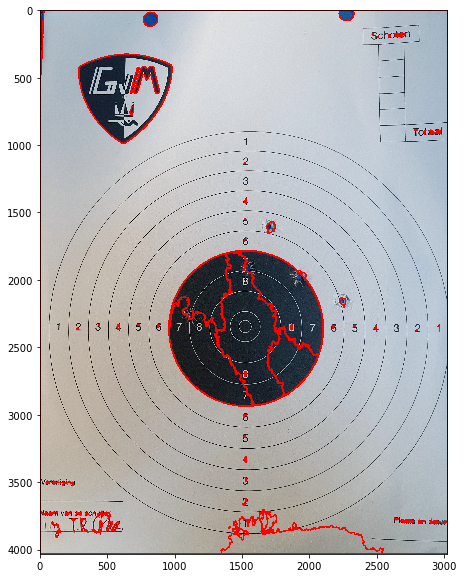

In [50]:
display(sep_coins)